In [2]:
import numpy as np
import torch
from tqdm.notebook import tqdm
from scipy.ndimage import gaussian_filter1d, median_filter
from matplotlib.ticker import MaxNLocator
import math
import matplotlib.pyplot as plt
import os, sys
import pandas as pd

from dim_est.analysis.plotting_functions_infinite_data import *

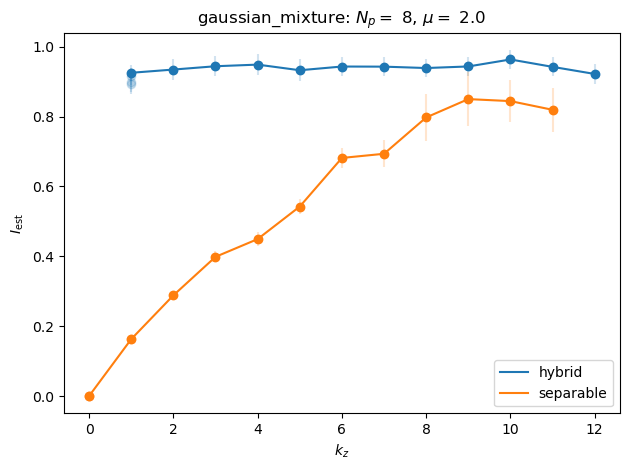

In [3]:
outfile = "h5_results/testing_a.h5"

dataset_type = 'gaussian_mixture'
n_peaks = 8
mu = 2.0
n_iter =2_000
mi_bits_peak = 2.0

sweep_tags = {
    "tags.dataset_type": [dataset_type],
    "tags.critic_type": ["hybrid", "separable"],
}

extra_filters = {
    "tags.estimator": "lclip",
    "params.dataset_cfg.n_peaks": n_peaks,
    "params.dataset_cfg.mu": mu,
    "params.dataset_cfg.mi_bits_peak": mi_bits_peak,
    "tags.n_iter": n_iter,
}

results_df = load_mi_summary(
    outfile=outfile,
    sweep_tags=sweep_tags,
    extra_filters=extra_filters,
    metric_key="mi_bits",         # whatever your array is called
    include_meta_keys=[
        "params.critic_cfg.Nx",
        "params.critic_cfg.Ny",
        "params.critic_cfg.embed_dim",
        "params.training.lr",
    ]
)



fig, ax = plt.subplots()
for critic_type, df_sub in results_df.groupby("critic_type"):

            
    axerr,_,_ = ax.errorbar(
        df_sub["critic_cfg.embed_dim"],
        df_sub["max_smoothed_info"],
        yerr= df_sub["std_smoothed_info"],
        fmt='o', alpha=0.2)

    # compute mean ± std
    agg = (
        df_sub.groupby("critic_cfg.embed_dim")["max_smoothed_info"]
        .agg(["max"])
        .reset_index()
    )

    label = f"{critic_type}"


    ax.plot(
        agg["critic_cfg.embed_dim"],
        agg["max"],
        label=label,
        linewidth=1.5,  c=axerr.get_color()
        )
    ax.scatter(
        agg["critic_cfg.embed_dim"],
        agg["max"],
        c=axerr.get_color(), 
        alpha=1.0
        )

# ax.axvline(low_dim, c='k', ls='--')
# formatting
# ax.set_xscale("log")
ax.set_xlabel(r"$k_z$")
ax.set_ylabel(r"$I_{\rm est}$")
ax.legend()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title(rf'{dataset_type}: $N_p =$ {n_peaks}, $\mu =$ {mu}' )
# ax.set_ylim([0, 1.5])
plt.tight_layout()
plt.show()

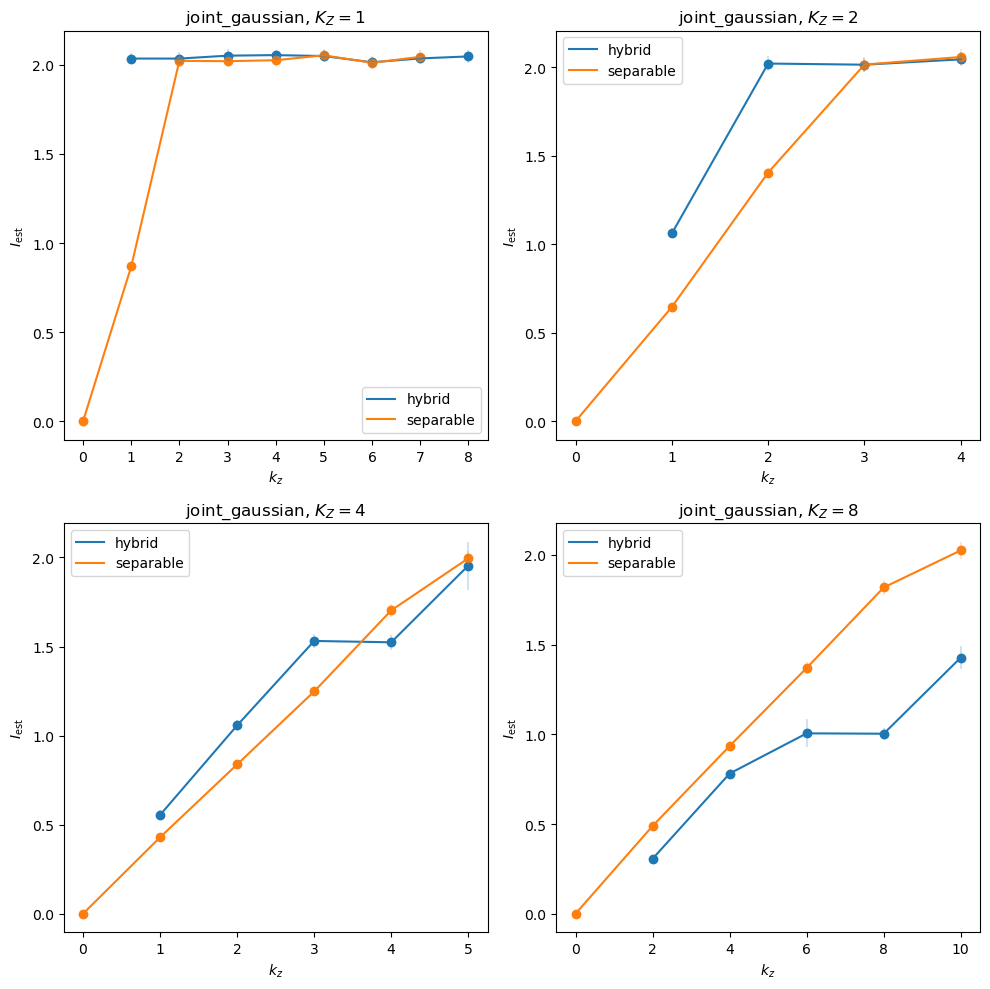

In [3]:
fig, axes = plt.subplots(2,2, figsize=(10,10))
axes=axes.flatten()


outfile = "h5_results/testing_b.h5"
dataset_type = 'joint_gaussian'
n_iter =2_000
mi_bits = 2.0

for ii, latent_dim in enumerate([1,2,4,8]):
    ax=axes[ii]
    
    sweep_tags = {
        "tags.dataset_type": [dataset_type],
        "tags.critic_type": ["hybrid", "separable"],
    }
    
    extra_filters = {
        "tags.estimator": "lclip",
        "params.dataset_cfg.latent_dim": latent_dim,
        "params.dataset_cfg.mi_bits": mi_bits,
        "tags.n_iter": n_iter,
    }
    
    results_df = load_mi_summary(
        outfile=outfile,
        sweep_tags=sweep_tags,
        extra_filters=extra_filters,
        metric_key="mi_bits",         # whatever your array is called
        include_meta_keys=[
            "params.critic_cfg.Nx",
            "params.critic_cfg.Ny",
            "params.critic_cfg.embed_dim",
            "params.training.lr",
        ]
    )
    
    
    
    for critic_type, df_sub in results_df.groupby("critic_type"):
    
                
        axerr,_,_ = ax.errorbar(
            df_sub["critic_cfg.embed_dim"],
            df_sub["max_smoothed_info"],
            yerr= df_sub["std_smoothed_info"],
            fmt='o', alpha=0.2)
    
        # compute mean ± std
        agg = (
            df_sub.groupby("critic_cfg.embed_dim")["max_smoothed_info"]
            .agg(["max"])
            .reset_index()
        )
    
        label = f"{critic_type}"
    
    
        ax.plot(
            agg["critic_cfg.embed_dim"],
            agg["max"],
            label=label,
            linewidth=1.5,  c=axerr.get_color()
            )
        ax.scatter(
            agg["critic_cfg.embed_dim"],
            agg["max"],
            c=axerr.get_color(), 
            alpha=1.0
            )
    
    # ax.axvline(low_dim, c='k', ls='--')
    # formatting
    # ax.set_xscale("log")
    ax.set_xlabel(r"$k_z$")
    ax.set_ylabel(r"$I_{\rm est}$")
    ax.legend()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_title(rf'{dataset_type}, $K_Z = {latent_dim}$' )
    # ax.set_ylim([0, 1.5])
plt.tight_layout()
plt.show()

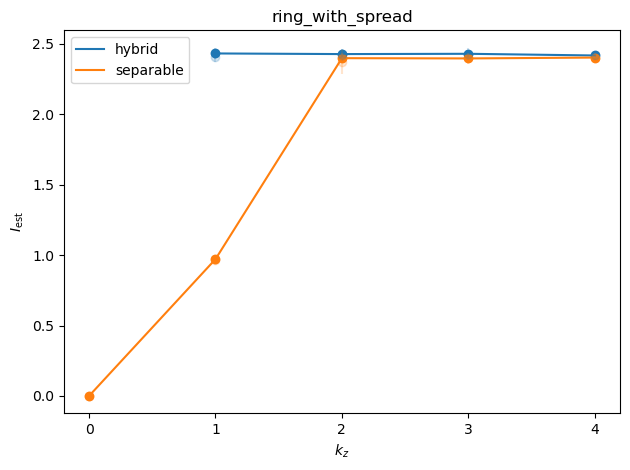

In [4]:
outfile = "h5_results/testing_c.h5"
dataset_type = 'ring_with_spread'
n_iter =2_000

sweep_tags = {
    "tags.dataset_type": [dataset_type],
    "tags.critic_type": ["hybrid", "separable"],
}

extra_filters = {
    "tags.estimator": "lclip",
    "tags.n_iter": n_iter,
    # "params.dataset_cfg.mi_bits_peak": mi_bits_peak,
}

results_df = load_mi_summary(
    outfile=outfile,
    sweep_tags=sweep_tags,
    extra_filters=extra_filters,
    metric_key="mi_bits",         # whatever your array is called
    include_meta_keys=[
        "params.critic_cfg.Nx",
        "params.critic_cfg.Ny",
        "params.critic_cfg.embed_dim",
        "params.training.lr",
    ]
)


fig, ax = plt.subplots()
for critic_type, df_sub in results_df.groupby("critic_type"):

            
    axerr,_,_ = ax.errorbar(
        df_sub["critic_cfg.embed_dim"],
        df_sub["max_smoothed_info"],
        yerr= df_sub["std_smoothed_info"],
        fmt='o', alpha=0.2)

    # compute mean ± std
    agg = (
        df_sub.groupby("critic_cfg.embed_dim")["max_smoothed_info"]
        .agg(["max"])
        .reset_index()
    )

    label = f"{critic_type}"


    ax.plot(
        agg["critic_cfg.embed_dim"],
        agg["max"],
        label=label,
        linewidth=1.5,  c=axerr.get_color()
        )
    ax.scatter(
        agg["critic_cfg.embed_dim"],
        agg["max"],
        c=axerr.get_color(), 
        alpha=1.0
        )

# ax.axvline(low_dim, c='k', ls='--')
# formatting
# ax.set_xscale("log")
ax.set_xlabel(r"$k_z$")
ax.set_ylabel(r"$I_{\rm est}$")
ax.legend()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title(rf'{dataset_type}' )
# ax.set_ylim([0, 1.5])
plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../h5_results/testing_d.h5'

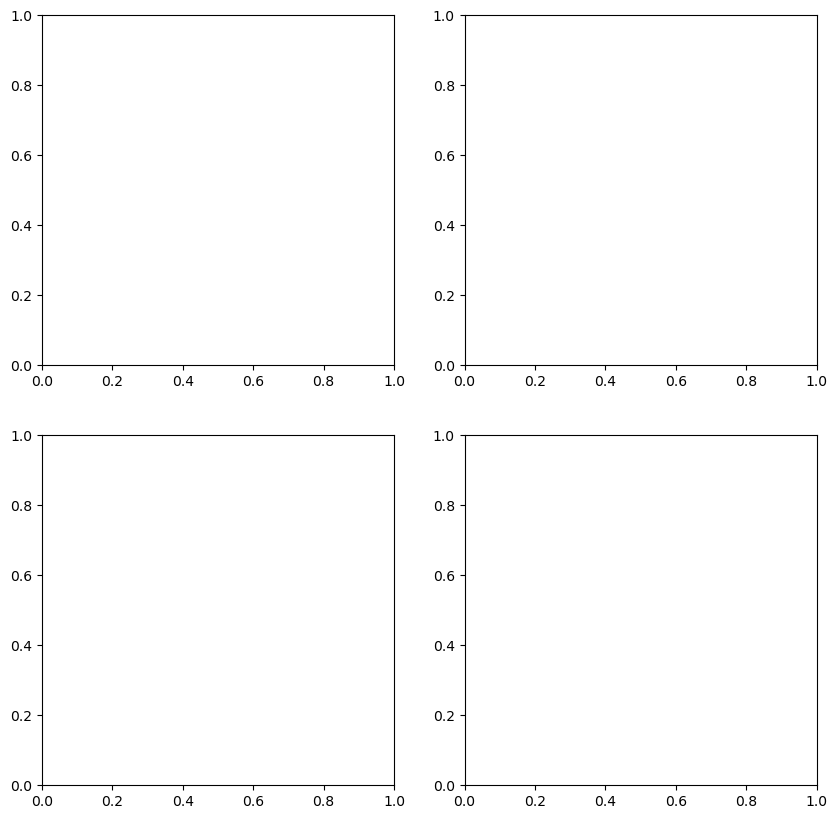

In [5]:
fig, axes  = plt.subplots(2,2, figsize=(10,10))

axes = axes.flatten()

for ii, latent_dim in enumerate([1, 2, 3, 4]):
    ax = axes[ii]
    
    outfile = "../h5_results/testing_d.h5"
    dataset_type = 'hyperspherical_shell'
    radial_std = 2.0
    n_iter=20_000
    
    sweep_tags = {
        "tags.dataset_type": [dataset_type],
        "tags.critic_type": ["hybrid", "separable"],
        "params.dataset_cfg.sig_embed": [5.0, 2.0, 1.0],
    }
    
    extra_filters = {
        "tags.estimator": "lclip",
        "params.dataset_cfg.latent_dim": latent_dim,
        "params.dataset_cfg.radial_std": radial_std,
        # "params.dataset_cfg.mi_bits_peak": mi_bits_peak,
        "tags.n_iter": n_iter,
    }
    
    results_df = load_mi_summary(
        outfile=outfile,
        sweep_tags=sweep_tags,
        extra_filters=extra_filters,
        metric_key="mi_bits",         # whatever your array is called
        include_meta_keys=[
            "params.critic_cfg.Nx",
            "params.critic_cfg.Ny",
            "params.critic_cfg.embed_dim",
            "params.training.lr",
        ]
    )
    
    
    # fig, ax = plt.subplots()
    for (critic_type, sig_embed), df_sub in results_df.groupby(["critic_type", "dataset_cfg.sig_embed"]):            
        axerr,_,_ = ax.errorbar(
            df_sub["critic_cfg.embed_dim"],
            df_sub["max_smoothed_info"],
            yerr= df_sub["std_smoothed_info"],
            fmt='o', alpha=0.2)
    
        # compute mean ± std
        agg = (
            df_sub.groupby("critic_cfg.embed_dim")["max_smoothed_info"]
            .agg(["max"])
            .reset_index()
        )
    
        label = rf"{critic_type}, $\eta = $ {sig_embed}"
    
    
        ax.plot(
            agg["critic_cfg.embed_dim"],
            agg["max"],
            label=label,
            linewidth=1.5,  c=axerr.get_color()
            )
        ax.scatter(
            agg["critic_cfg.embed_dim"],
            agg["max"],
            c=axerr.get_color(), 
            alpha=1.0
            )
        
    # ax.axvline(low_dim, c='k', ls='--')
    # formatting
    # ax.set_xscale("log")
    ax.set_xlabel(r"$k_z$")
    ax.set_ylabel(r"$I_{\rm est}$")
    ax.legend()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_title(rf'{dataset_type}: $K_Z = $ {latent_dim}, $\sigma_r = $ {radial_std}' )
# ax.set_ylim([0, 1.5])
plt.tight_layout()
plt.show()

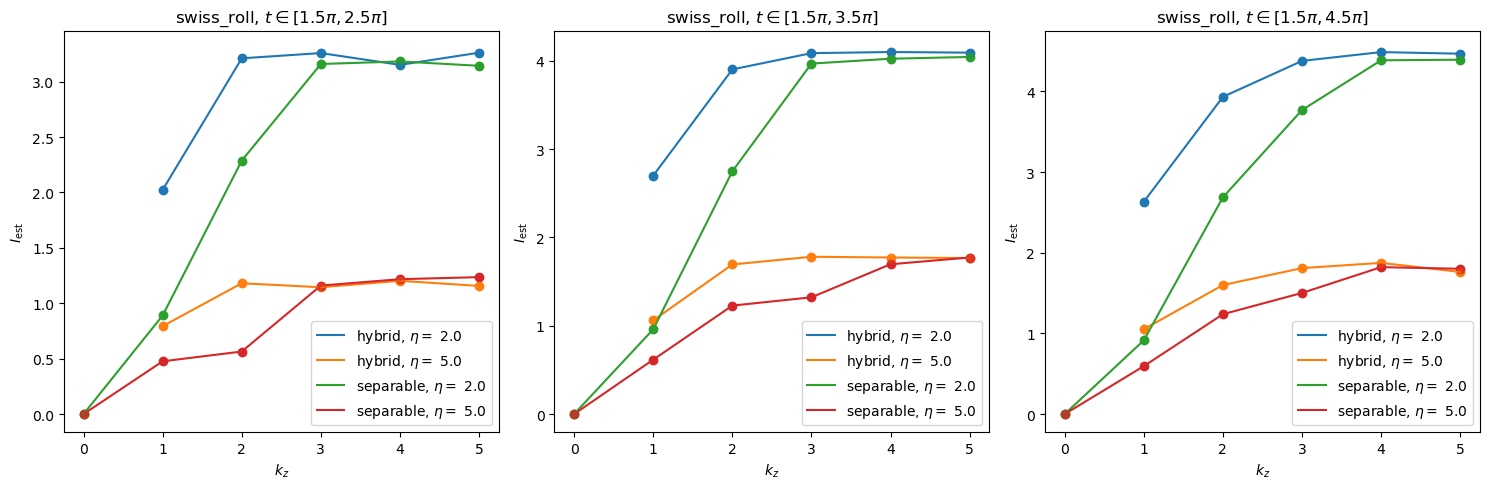

In [6]:
fig, axes  = plt.subplots(1,3, figsize=(15,5))
latent_dim =3

for ii, t_max in enumerate([2.5, 3.5, 4.5]): 
    ax = axes[ii]
    outfile = "h5_results/testing_e.h5"
    dataset_type = 'swiss_roll'
    n_iter=20_000
    t_min = 1.5
    
    sweep_tags = {
        "tags.dataset_type": [dataset_type],
        "tags.critic_type": ["hybrid", "separable"],
        "params.dataset_cfg.sig_embed": [5.0, 2.0, 1.0],
    }
        
    extra_filters = {
        "tags.estimator": "lclip",
        "params.dataset_cfg.latent_dim": latent_dim,
        "tags.n_iter": n_iter,
        "params.dataset_cfg.t_min_pi_units": t_min,
        "params.dataset_cfg.t_max_pi_units": t_max,
    }
    
    results_df = load_mi_summary(
        outfile=outfile,
        sweep_tags=sweep_tags,
        extra_filters=extra_filters,
        metric_key="mi_bits",         # whatever your array is called
        include_meta_keys=[
            "params.critic_cfg.Nx",
            "params.critic_cfg.Ny",
            "params.critic_cfg.embed_dim",
            "params.training.lr",
        ]
    )
    
    
    # fig, ax = plt.subplots()
    for (critic_type, sig_embed), df_sub in results_df.groupby(["critic_type", "dataset_cfg.sig_embed"]):            
        axerr,_,_ = ax.errorbar(
            df_sub["critic_cfg.embed_dim"],
            df_sub["max_smoothed_info"],
            yerr= df_sub["std_smoothed_info"],
            fmt='o', alpha=0.2)
    
        # compute mean ± std
        agg = (
            df_sub.groupby("critic_cfg.embed_dim")["max_smoothed_info"]
            .agg(["max"])
            .reset_index()
        )
    
        label = rf"{critic_type}, $\eta = $ {sig_embed}"
    
    
        ax.plot(
            agg["critic_cfg.embed_dim"],
            agg["max"],
            label=label,
            linewidth=1.5,  c=axerr.get_color()
            )
        ax.scatter(
            agg["critic_cfg.embed_dim"],
            agg["max"],
            c=axerr.get_color(), 
            alpha=1.0
            )
        
    # ax.axvline(low_dim, c='k', ls='--')
    # formatting
    # ax.set_xscale("log")
    ax.set_xlabel(r"$k_z$")
    ax.set_ylabel(r"$I_{\rm est}$")
    ax.legend()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_title(rf'{dataset_type}, $t \in [{t_min}\pi, {t_max}\pi] $' )
    
# ax.set_ylim([0, 1.5])
plt.tight_layout()
plt.show()

# MULTI-TRIAL CLUSTER DATA

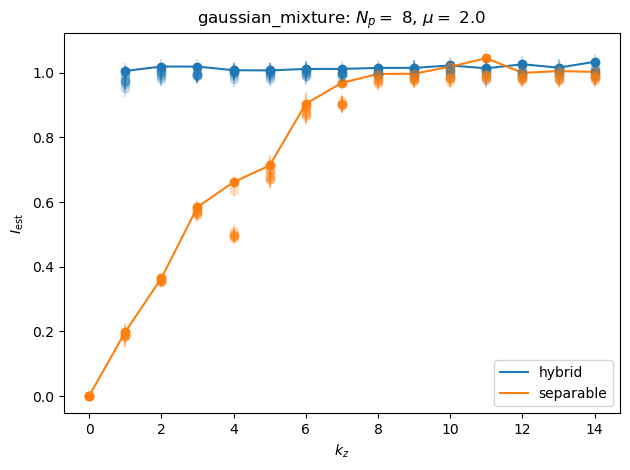

In [7]:
outfile = "h5_results/testing_gaussian_mixture.h5"
dataset_type = 'gaussian_mixture'
n_peaks = 8
mu = 2.0
n_iter =20_000
mi_bits_peak = 2.0

sweep_tags = {
    "tags.dataset_type": [dataset_type],
    "tags.critic_type": ["hybrid", "separable"],
}

extra_filters = {
    "tags.estimator": "lclip",
    "params.dataset_cfg.n_peaks": n_peaks,
    "params.dataset_cfg.mu": mu,
    "params.dataset_cfg.mi_bits_peak": mi_bits_peak,
    "tags.n_iter": n_iter,
}

results_df = load_mi_summary(
    outfile=outfile,
    sweep_tags=sweep_tags,
    extra_filters=extra_filters,
    metric_key="mi_bits",         # whatever your array is called
    include_meta_keys=[
        "params.critic_cfg.Nx",
        "params.critic_cfg.Ny",
        "params.critic_cfg.embed_dim",
        "params.training.lr",
    ]
)



fig, ax = plt.subplots()
if not results_df.empty:  
    for critic_type, df_sub in results_df.groupby("critic_type"):
    
                
        axerr,_,_ = ax.errorbar(
            df_sub["critic_cfg.embed_dim"],
            df_sub["max_smoothed_info"],
            yerr= df_sub["std_smoothed_info"],
            fmt='o', alpha=0.2)
    
        # compute mean ± std
        agg = (
            df_sub.groupby("critic_cfg.embed_dim")["max_smoothed_info"]
            .agg(["max"])
            .reset_index()
        )
    
        label = f"{critic_type}"
    
    
        ax.plot(
            agg["critic_cfg.embed_dim"],
            agg["max"],
            label=label,
            linewidth=1.5,  c=axerr.get_color()
            )
        ax.scatter(
            agg["critic_cfg.embed_dim"],
            agg["max"],
            c=axerr.get_color(), 
            alpha=1.0
            )

# ax.axvline(low_dim, c='k', ls='--')
# formatting
# ax.set_xscale("log")
ax.set_xlabel(r"$k_z$")
ax.set_ylabel(r"$I_{\rm est}$")
ax.legend()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title(rf'{dataset_type}: $N_p =$ {n_peaks}, $\mu =$ {mu}' )
# ax.set_ylim([0, 1.5])
plt.tight_layout()
plt.show()

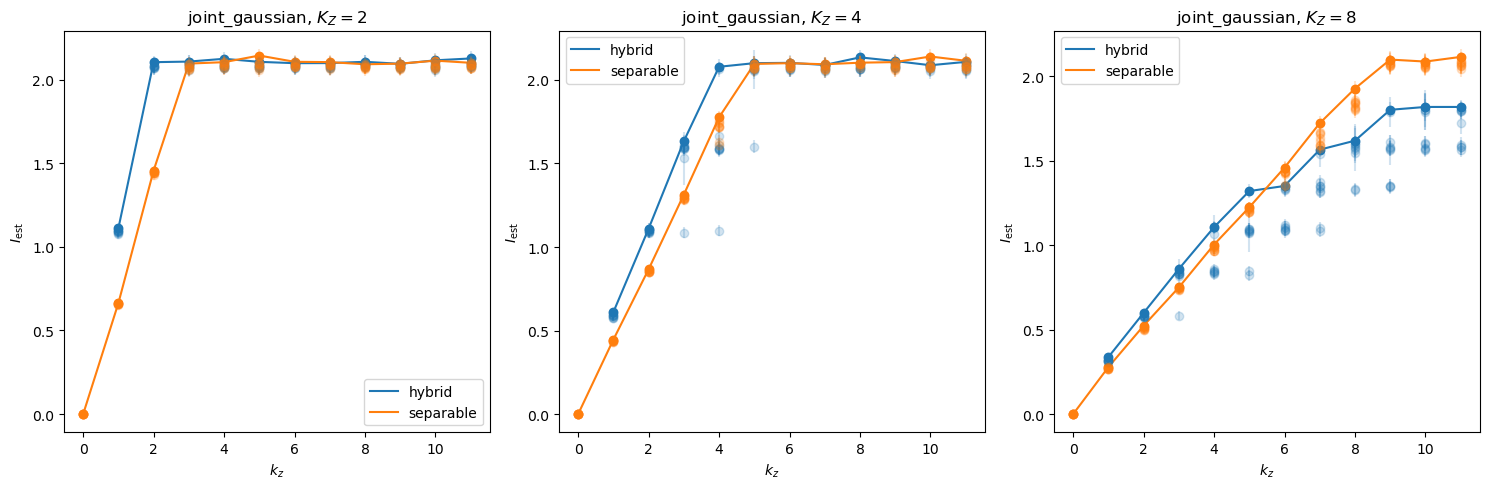

In [8]:
fig, axes = plt.subplots(1,3, figsize=(15,5))
axes=axes.flatten()


outfile = "h5_results/testing_joint_gaussian.h5"
dataset_type = 'joint_gaussian'
n_iter =20_000
mi_bits = 2.0

for ii, latent_dim in enumerate([2,4,8]):
    ax=axes[ii]
    
    sweep_tags = {
        "tags.dataset_type": [dataset_type],
        "tags.critic_type": ["hybrid", "separable"],
    }
    
    extra_filters = {
        "tags.estimator": "lclip",
        "params.dataset_cfg.latent_dim": latent_dim,
        "params.dataset_cfg.mi_bits": mi_bits,
        "tags.n_iter": n_iter,
    }
    
    results_df = load_mi_summary(
        outfile=outfile,
        sweep_tags=sweep_tags,
        extra_filters=extra_filters,
        metric_key="mi_bits",         # whatever your array is called
        include_meta_keys=[
            "params.critic_cfg.Nx",
            "params.critic_cfg.Ny",
            "params.critic_cfg.embed_dim",
            "params.training.lr",
        ]
    )


    if not results_df.empty:  
        
        for critic_type, df_sub in results_df.groupby("critic_type"):
        
                    
            axerr,_,_ = ax.errorbar(
                df_sub["critic_cfg.embed_dim"],
                df_sub["max_smoothed_info"],
                yerr= df_sub["std_smoothed_info"],
                fmt='o', alpha=0.2)
        
            # compute mean ± std
            agg = (
                df_sub.groupby("critic_cfg.embed_dim")["max_smoothed_info"]
                .agg(["max"])
                .reset_index()
            )
        
            label = f"{critic_type}"
        
        
            ax.plot(
                agg["critic_cfg.embed_dim"],
                agg["max"],
                label=label,
                linewidth=1.5,  c=axerr.get_color()
                )
            ax.scatter(
                agg["critic_cfg.embed_dim"],
                agg["max"],
                c=axerr.get_color(), 
                alpha=1.0
            )
    
    # ax.axvline(low_dim, c='k', ls='--')
    # formatting
    # ax.set_xscale("log")
    ax.set_xlabel(r"$k_z$")
    ax.set_ylabel(r"$I_{\rm est}$")
    ax.legend()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_title(rf'{dataset_type}, $K_Z = {latent_dim}$' )
    # ax.set_ylim([0, 1.5])
plt.tight_layout()
plt.show()

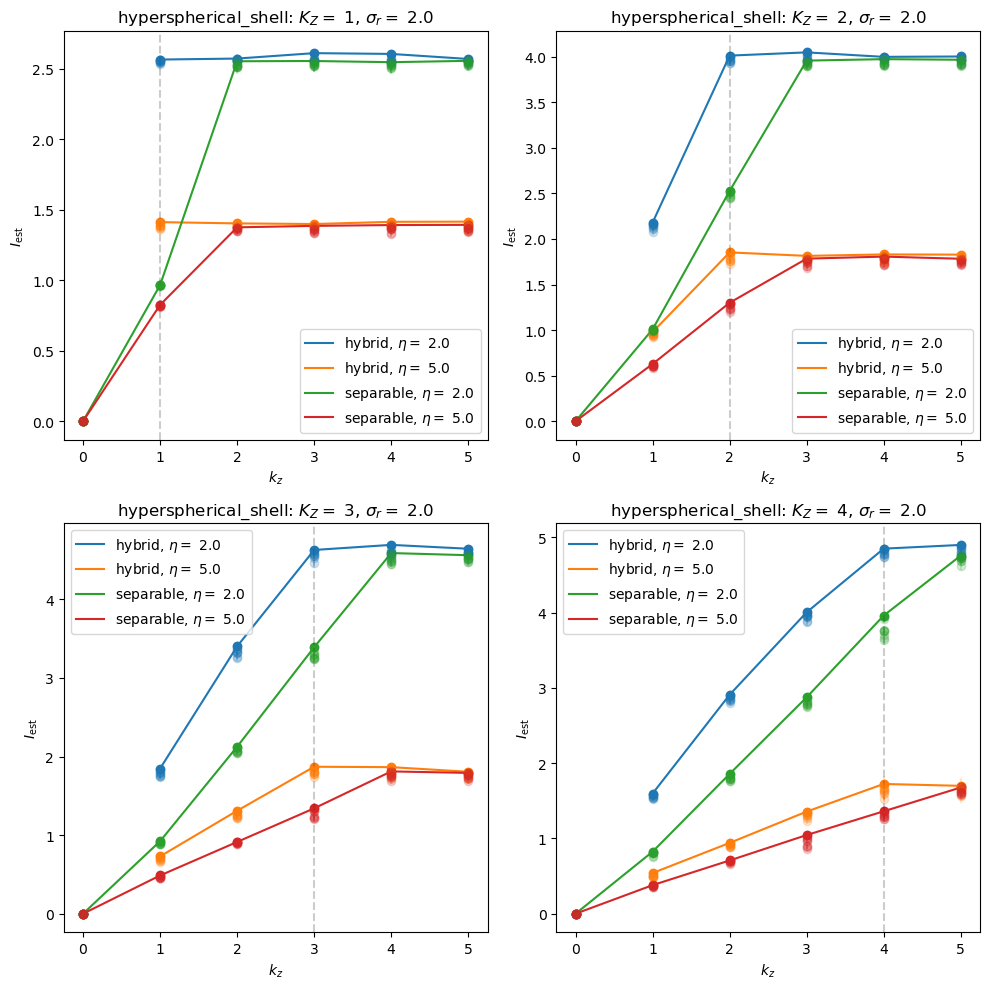

In [9]:
fig, axes  = plt.subplots(2,2, figsize=(10,10))

axes = axes.flatten()

for ii, latent_dim in enumerate([1, 2, 3, 4]): #6 -- kz span wasn't long enough for that
    ax = axes[ii]
    
    outfile = "h5_results/testing_hyperspherical_shell.h5"
    dataset_type = 'hyperspherical_shell'
    radial_std = 2.0
    n_iter=20_000
    
    sweep_tags = {
        "tags.dataset_type": [dataset_type],
        "tags.critic_type": ["hybrid", "separable"],
        "params.dataset_cfg.sig_embed": [5.0, 2.0, 1.0],
    }
    
    extra_filters = {
        "tags.estimator": "lclip",
        "params.dataset_cfg.latent_dim": latent_dim,
        "params.dataset_cfg.radial_std": radial_std,
        # "params.dataset_cfg.mi_bits_peak": mi_bits_peak,
        "tags.n_iter": n_iter,
    }
    
    results_df = load_mi_summary(
        outfile=outfile,
        sweep_tags=sweep_tags,
        extra_filters=extra_filters,
        metric_key="mi_bits",         # whatever your array is called
        include_meta_keys=[
            "params.critic_cfg.Nx",
            "params.critic_cfg.Ny",
            "params.critic_cfg.embed_dim",
            "params.training.lr",
        ]
    )
    
    if not results_df.empty:  
        # fig, ax = plt.subplots()
        for (critic_type, sig_embed), df_sub in results_df.groupby(["critic_type", "dataset_cfg.sig_embed"]):            
            axerr,_,_ = ax.errorbar(
                df_sub["critic_cfg.embed_dim"],
                df_sub["max_smoothed_info"],
                yerr= df_sub["std_smoothed_info"],
                fmt='o', alpha=0.2)
        
            # compute mean ± std
            agg = (
                df_sub.groupby("critic_cfg.embed_dim")["max_smoothed_info"]
                .agg(["max"])
                .reset_index()
            )
        
            label = rf"{critic_type}, $\eta = $ {sig_embed}"
        
        
            ax.plot(
                agg["critic_cfg.embed_dim"],
                agg["max"],
                label=label,
                linewidth=1.5,  c=axerr.get_color()
                )
            ax.scatter(
                agg["critic_cfg.embed_dim"],
                agg["max"],
                c=axerr.get_color(), 
                alpha=1.0
                )
            
    # ax.axvline(low_dim, c='k', ls='--')
    # formatting
    # ax.set_xscale("log")
    ax.set_xlabel(r"$k_z$")
    ax.set_ylabel(r"$I_{\rm est}$")
    ax.legend()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_title(rf'{dataset_type}: $K_Z = $ {latent_dim}, $\sigma_r = $ {radial_std}' )
    ax.axvline(latent_dim, ls='--', c='k', alpha=0.2)
# ax.set_ylim([0, 1.5])
plt.tight_layout()
plt.show()

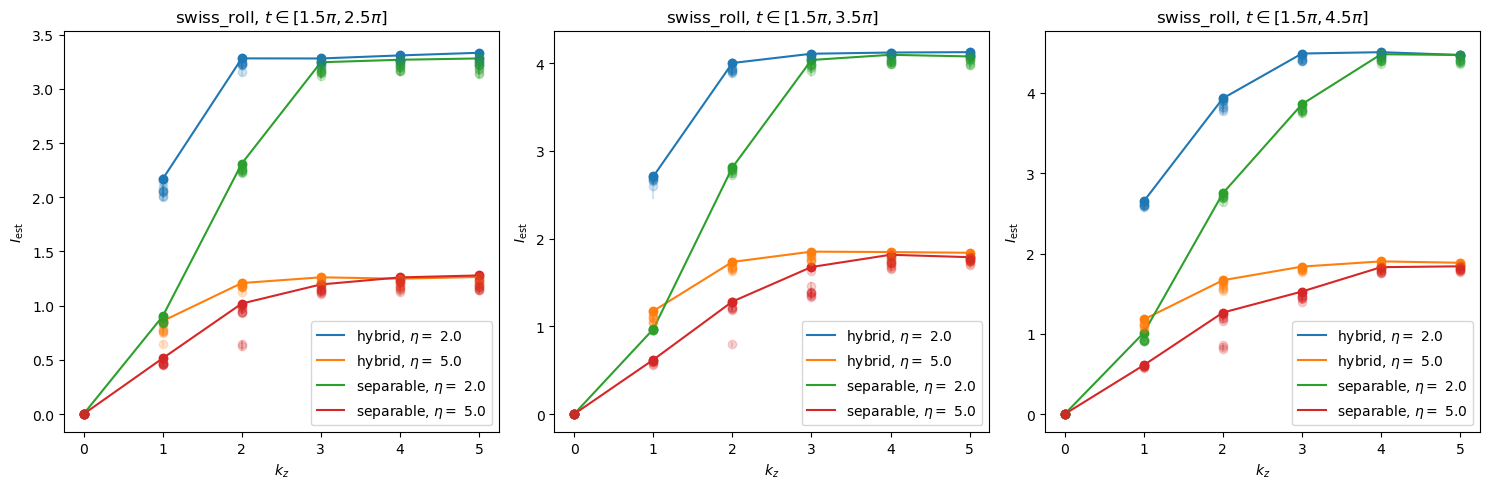

In [11]:
fig, axes  = plt.subplots(1,3, figsize=(15,5))
latent_dim =3

for ii, t_max in enumerate([2.5, 3.5, 4.5]): 
    ax = axes[ii]
    outfile = "h5_results/testing_swiss_roll.h5"
    dataset_type = 'swiss_roll'
    n_iter=20_000
    t_min = 1.5
    
    sweep_tags = {
        "tags.dataset_type": [dataset_type],
        "tags.critic_type": ["hybrid", "separable"],
        "params.dataset_cfg.sig_embed": [5.0, 2.0, 1.0],
    }
        
    extra_filters = {
        "tags.estimator": "lclip",
        "params.dataset_cfg.latent_dim": latent_dim,
        "tags.n_iter": n_iter,
        "params.dataset_cfg.t_min_pi_units": t_min,
        "params.dataset_cfg.t_max_pi_units": t_max,
    }
    
    results_df = load_mi_summary(
        outfile=outfile,
        sweep_tags=sweep_tags,
        extra_filters=extra_filters,
        metric_key="mi_bits",         # whatever your array is called
        include_meta_keys=[
            "params.critic_cfg.Nx",
            "params.critic_cfg.Ny",
            "params.critic_cfg.embed_dim",
            "params.training.lr",
        ]
    )
    
    if not results_df.empty:
        for (critic_type, sig_embed), df_sub in results_df.groupby(["critic_type", "dataset_cfg.sig_embed"]):            
            axerr,_,_ = ax.errorbar(
                df_sub["critic_cfg.embed_dim"],
                df_sub["max_smoothed_info"],
                yerr= df_sub["std_smoothed_info"],
                fmt='o', alpha=0.2)
        
            # compute mean ± std
            agg = (
                df_sub.groupby("critic_cfg.embed_dim")["max_smoothed_info"]
                .agg(["max"])
                .reset_index()
            )
        
            label = rf"{critic_type}, $\eta = $ {sig_embed}"
        
        
            ax.plot(
                agg["critic_cfg.embed_dim"],
                agg["max"],
                label=label,
                linewidth=1.5,  c=axerr.get_color()
                )
            ax.scatter(
                agg["critic_cfg.embed_dim"],
                agg["max"],
                c=axerr.get_color(), 
                alpha=1.0
                )
            
    # ax.axvline(low_dim, c='k', ls='--')
    # formatting
    # ax.set_xscale("log")
    ax.set_xlabel(r"$k_z$")
    ax.set_ylabel(r"$I_{\rm est}$")
    ax.legend()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_title(rf'{dataset_type}, $t \in [{t_min}\pi, {t_max}\pi] $' )
    
# ax.set_ylim([0, 1.5])
plt.tight_layout()
plt.show()

# Hyperparameter optimization

embed_dim: 6;  Nx: 500 Ny: 500 Encoder hidden dim: 512 Encoder layers dim: 2 lr: 0.0001 n_iter: 20000 MI : 1.2911320924758911
embed_dim: 10;  Nx: 500 Ny: 500 Encoder hidden dim: 512 Encoder layers dim: 2 lr: 0.0001 n_iter: 20000 MI : 1.9336090087890625


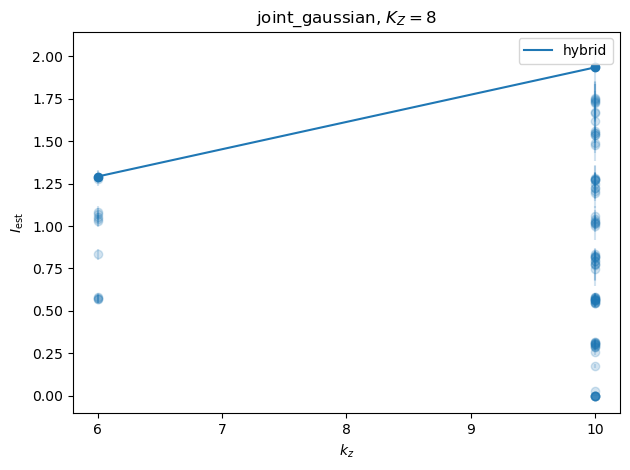

In [12]:
fig, ax = plt.subplots()


outfile = "h5_results/testing_b_hp.h5"
dataset_type = 'joint_gaussian'
# n_iter = 20_000
mi_bits = 2.0

latent_dim = 8

sweep_tags = {
    "tags.dataset_type": [dataset_type],
    "tags.critic_type": ["hybrid", "separable"],
}

extra_filters = {
    "tags.estimator": "lclip",
    "params.dataset_cfg.latent_dim": latent_dim,
    "params.dataset_cfg.mi_bits": mi_bits,
    # "tags.n_iter": n_iter 
}

results_df = load_mi_summary(
    outfile=outfile,
    sweep_tags=sweep_tags,
    extra_filters=extra_filters,
    metric_key="mi_bits",         # whatever your array is called
    include_meta_keys=[
        "params.dataset_cfg.latent_dim",
        "params.critic_cfg.Nx",
        "params.critic_cfg.Ny",
        "params.critic_cfg.embed_dim",
        "params.training_cfg.lr",
        "params.critic_cfg.x_hidden_dim",
        "params.critic_cfg.x_layers",
        "tags.n_iter"
    ]
)



for critic_type, df_sub in results_df.groupby("critic_type"):

            
    axerr,_,_ = ax.errorbar(
        df_sub["critic_cfg.embed_dim"],
        df_sub["max_smoothed_info"],
        yerr= df_sub["std_smoothed_info"],
        fmt='o', alpha=0.2)

    # compute mean ± std
    agg = (
        df_sub.groupby("critic_cfg.embed_dim")["max_smoothed_info"]
        .agg(["max"])
        .reset_index()
    )

    label = f"{critic_type}"


    ax.plot(
        agg["critic_cfg.embed_dim"],
        agg["max"],
        label=label,
        linewidth=1.5,  c=axerr.get_color()
        )
    ax.scatter(
        agg["critic_cfg.embed_dim"],
        agg["max"],
        c=axerr.get_color(), 
        alpha=1.0
        )


    ## Print the parameters for the best run
    idx_of_max = (df_sub.groupby("critic_cfg.embed_dim")["max_smoothed_info"].idxmax())

    # Iterate in order of embed_dim and print
    for _, row in df_sub.loc[idx_of_max].sort_values("critic_cfg.embed_dim").iterrows():
        print(
            f'embed_dim: {row["critic_cfg.embed_dim"]}; ',
            f'Nx: {row["critic_cfg.Nx"]}',
            f'Ny: {row["critic_cfg.Ny"]}',
            f'Encoder hidden dim: {row["critic_cfg.x_hidden_dim"]}',
            f'Encoder layers dim: {row["critic_cfg.x_layers"]}',
            f'lr: {row["training_cfg.lr"]}',
            f'n_iter: {row["n_iter"]}',
            f'MI : {row["max_smoothed_info"]}',
        )


# ax.axvline(low_dim, c='k', ls='--')
# formatting
# ax.set_xscale("log")
ax.set_xlabel(r"$k_z$")
ax.set_ylabel(r"$I_{\rm est}$")
ax.legend()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title(rf'{dataset_type}, $K_Z = {latent_dim}$' )
# ax.set_ylim([0, 1.5])
plt.tight_layout()
plt.show()


embed_dim: 6;  Nx: 500 Ny: 500 Encoder hidden dim: 256 Encoder layers: 2 lr: 0.0001 n_iter: 50000 MI : 1.4010100364685059
embed_dim: 8;  Nx: 500 Ny: 500 Encoder hidden dim: 256 Encoder layers: 2 lr: 0.0001 n_iter: 50000 MI : 1.8668893575668335
embed_dim: 10;  Nx: 500 Ny: 500 Encoder hidden dim: 512 Encoder layers: 2 lr: 0.0001 n_iter: 20000 MI : 1.894872784614563


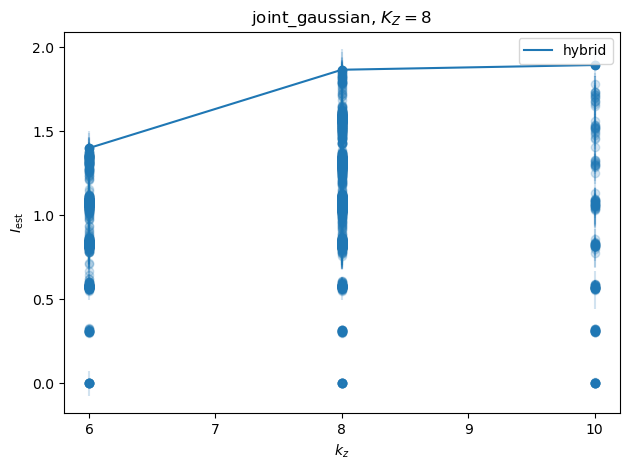

In [13]:
fig, ax = plt.subplots()


outfile = "h5_results/hp_sweep_joint_gaussian.h5"
dataset_type = 'joint_gaussian'
mi_bits = 2.0

latent_dim = 8

sweep_tags = {
    "tags.dataset_type": [dataset_type],
    "tags.critic_type": ["hybrid", "separable"],
}

extra_filters = {
    "tags.estimator": "lclip",
    "params.dataset_cfg.latent_dim": latent_dim,
    "params.dataset_cfg.mi_bits": mi_bits,
}

results_df = load_mi_summary(
    outfile=outfile,
    sweep_tags=sweep_tags,
    extra_filters=extra_filters,
    metric_key="mi_bits",         # whatever your array is called
    include_meta_keys=[
        "params.dataset_cfg.latent_dim",
        "params.critic_cfg.Nx",
        "params.critic_cfg.Ny",
        "params.critic_cfg.embed_dim",
        "params.training_cfg.lr",
        "params.critic_cfg.x_hidden_dim",
        "params.critic_cfg.x_layers",
        "tags.n_iter"
    ]
)



for critic_type, df_sub in results_df.groupby("critic_type"):

            
    axerr,_,_ = ax.errorbar(
        df_sub["critic_cfg.embed_dim"],
        df_sub["max_smoothed_info"],
        yerr= df_sub["std_smoothed_info"],
        fmt='o', alpha=0.2)

    # compute mean ± std
    agg = (
        df_sub.groupby("critic_cfg.embed_dim")["max_smoothed_info"]
        .agg(["max"])
        .reset_index()
    )

    label = f"{critic_type}"


    ax.plot(
        agg["critic_cfg.embed_dim"],
        agg["max"],
        label=label,
        linewidth=1.5,  c=axerr.get_color()
        )
    ax.scatter(
        agg["critic_cfg.embed_dim"],
        agg["max"],
        c=axerr.get_color(), 
        alpha=1.0
        )


    ## Print the parameters for the best run
    idx_of_max = (df_sub.groupby("critic_cfg.embed_dim")["max_smoothed_info"].idxmax())

    # Iterate in order of embed_dim and print
    for _, row in df_sub.loc[idx_of_max].sort_values("critic_cfg.embed_dim").iterrows():
        print(
            f'embed_dim: {row["critic_cfg.embed_dim"]}; ',
            f'Nx: {row["critic_cfg.Nx"]}',
            f'Ny: {row["critic_cfg.Ny"]}',
            f'Encoder hidden dim: {row["critic_cfg.x_hidden_dim"]}',
            f'Encoder layers: {row["critic_cfg.x_layers"]}',
            f'lr: {row["training_cfg.lr"]}',
            f'n_iter: {row["n_iter"]}',
            f'MI : {row["max_smoothed_info"]}',
        )


# ax.axvline(low_dim, c='k', ls='--')
# formatting
# ax.set_xscale("log")
ax.set_xlabel(r"$k_z$")
ax.set_ylabel(r"$I_{\rm est}$")
ax.legend()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title(rf'{dataset_type}, $K_Z = {latent_dim}$' )
# ax.set_ylim([0, 1.5])
plt.tight_layout()
plt.show()
